<a href="https://colab.research.google.com/github/PhanQuangTan/CS232/blob/master/Room1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import os
import cv2
from sklearn import preprocessing
from pathlib import Path

Using TensorFlow backend.


In [3]:
!unzip "/content/drive/My Drive/m-c.zip" -d "dataset"

Archive:  /content/drive/My Drive/m-c.zip
   creating: dataset/images/
   creating: dataset/images/test/
  inflating: dataset/images/test/0.png  
  inflating: dataset/images/test/1.png  
  inflating: dataset/images/test/2.png  
  inflating: dataset/images/test/3.png  
  inflating: dataset/images/test/4.png  
  inflating: dataset/images/test/5.png  
  inflating: dataset/images/test/6.png  
  inflating: dataset/images/test/7.png  
  inflating: dataset/images/test/8.png  
  inflating: dataset/images/test/9.png  
   creating: dataset/images/train/
   creating: dataset/images/train/clean/
  inflating: dataset/images/train/clean/0.png  
  inflating: dataset/images/train/clean/1.png  
  inflating: dataset/images/train/clean/10.png  
  inflating: dataset/images/train/clean/11.png  
  inflating: dataset/images/train/clean/12.png  
  inflating: dataset/images/train/clean/13.png  
  inflating: dataset/images/train/clean/14.png  
  inflating: dataset/images/train/clean/15.png  
  inflating: datase

In [4]:
# storing train images path and label

train_path = []
label_train = []

path_train = "dataset/images/train"

for filename in os.listdir(path_train+"/clean/"):
    train_path.append(path_train + "/clean/" + filename)
    label_train.append(0)

for filename in os.listdir(path_train+"/messy"):
    train_path.append(path_train + "/messy/" + filename)
    label_train.append(1)

print("Number of train images: ", len(train_path))

Number of train images:  192


In [5]:
# storing validation images path and label

val_path = []
label_val = []

path_val = "dataset/images/val"

for filename in os.listdir(path_val+"/clean"):
    val_path.append(path_val + "/clean/" + filename)
    label_val.append(0)
    
for filename in os.listdir(path_val+"/messy"):
    val_path.append(path_val + "/messy/" + filename)
    label_val.append(1)
    
print("Number of validation images: ", len(val_path))

Number of validation images:  20


In [6]:
test_path = []

for filename in os.listdir("dataset/images/test/"):
    test_path.append("dataset/images/test/" + filename)

print("Number of validation images: ", len(test_path))

Number of validation images:  10


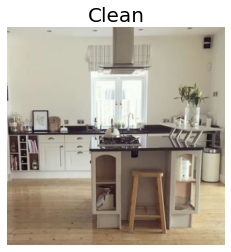

In [7]:
# checking train path
image = cv2.imread(train_path[0]) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# the first image bleongs to clean directory under train
plt.imshow(image)
plt.title("Clean", fontsize = 20)
plt.axis('off')
plt.show()

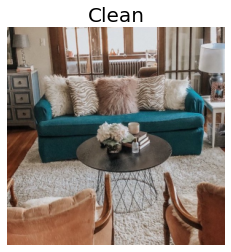

In [8]:
# checking validation path
image = cv2.imread(val_path[0]) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# the first image bleongs to clean directory under validation
plt.imshow(image)
plt.title("Clean", fontsize = 20)
plt.axis('off')
plt.show()

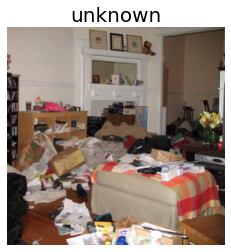

In [9]:
# checking test path
image = cv2.imread(test_path[0]) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# we dont know which image belongs to which category
plt.imshow(image)
plt.title("unknown", fontsize = 20)
plt.axis('off')
plt.show()

In [10]:
X_train = []
X_test = []
X_val = []

# reading images for train data
for path in train_path:
    
    image = cv2.imread(path)        
    image =  cv2.resize(image, (100,100))    
    X_train.append(image)
    
# reading images for test data
for path in test_path:
    
    image = cv2.imread(path)        
    image =  cv2.resize(image, (100,100))    
    X_test.append(image)

# reading images for validation data
for path in val_path:
    
    image = cv2.imread(path)
    image =  cv2.resize(image, (100,100))    
    X_val.append(image)


X_test = np.array(X_test)
X_train = np.array(X_train)
X_val = np.array(X_val)

In [11]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of X_val: ", X_val.shape)

Shape of X_train:  (192, 100, 100, 3)
Shape of X_test:  (10, 100, 100, 3)
Shape of X_val:  (20, 100, 100, 3)


In [12]:
X_train[:2]

array([[[[178, 194, 200],
         [181, 197, 201],
         [184, 197, 199],
         ...,
         [150, 168, 179],
         [147, 165, 176],
         [145, 164, 172]],

        [[181, 197, 203],
         [181, 197, 201],
         [186, 199, 201],
         ...,
         [140, 158, 169],
         [142, 160, 171],
         [144, 163, 171]],

        [[151, 167, 173],
         [176, 194, 196],
         [186, 199, 201],
         ...,
         [138, 159, 168],
         [140, 161, 169],
         [148, 165, 175]],

        ...,

        [[114, 140, 164],
         [118, 144, 168],
         [115, 141, 165],
         ...,
         [139, 175, 193],
         [144, 180, 196],
         [148, 183, 196]],

        [[100, 126, 150],
         [104, 130, 154],
         [102, 128, 152],
         ...,
         [147, 183, 201],
         [147, 184, 200],
         [152, 189, 203]],

        [[100, 126, 150],
         [ 98, 124, 148],
         [ 97, 123, 147],
         ...,
         [144, 180, 198],
        

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

In [14]:
# the shape is not going to change
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of X_val: ", X_val.shape)

Shape of X_train:  (192, 100, 100, 3)
Shape of X_test:  (10, 100, 100, 3)
Shape of X_val:  (20, 100, 100, 3)


In [15]:
# creating numpy array from the labels list
y_train = keras.utils.to_categorical(label_train, 2)
y_val = keras.utils.to_categorical(label_val, 2)

In [16]:
print("Shape of y_train: ", y_train.shape)
print("Shape of y_val: ", y_val.shape)

Shape of y_train:  (192, 2)
Shape of y_val:  (20, 2)


In [17]:
model = Sequential()

# input shape for first layer is 100,100,3 -> 100 * 100 pixles and 3 channels
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(100, 100, 3), activation="relu"))

# adding 32 nodes in the second layer
model.add(Conv2D(32, (3, 3), activation="relu"))

# maxpooling will take highest value from a filter of 2*2 shape
model.add(MaxPooling2D(pool_size=(2, 2)))

# it will prevent overfitting
model.add(Dropout(0.25))

# adding more layers similarly
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))

model.add(Dropout(0.5))

# activation function is sigmoid for the binary data
model.add(Dense(2, activation="sigmoid"))

# compiling the model
model.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)       

In [18]:
# training the model
history = model.fit(
    X_train,
    y_train,
    batch_size=30,
    epochs=30,
    validation_data=(X_val , y_val),
    shuffle=True
)

Train on 192 samples, validate on 20 samples
Epoch 1/30
192/192 [==============================] - 12s 60ms/step - loss: 1.0039 - accuracy: 0.4297 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 2/30
192/192 [==============================] - 11s 57ms/step - loss: 0.6908 - accuracy: 0.5104 - val_loss: 0.6887 - val_accuracy: 0.5250
Epoch 3/30
192/192 [==============================] - 11s 56ms/step - loss: 0.6780 - accuracy: 0.5417 - val_loss: 0.6493 - val_accuracy: 0.7500
Epoch 4/30
192/192 [==============================] - 11s 56ms/step - loss: 0.6350 - accuracy: 0.6146 - val_loss: 0.5733 - val_accuracy: 0.8000
Epoch 5/30
192/192 [==============================] - 11s 56ms/step - loss: 0.5665 - accuracy: 0.7109 - val_loss: 0.6264 - val_accuracy: 0.6500
Epoch 6/30
192/192 [==============================] - 11s 56ms/step - loss: 0.5585 - accuracy: 0.7161 - val_loss: 0.5920 - val_accuracy: 0.6500
Epoch 7/30
192/192 [==============================] - 11s 56ms/step - loss: 0.5200 - accura

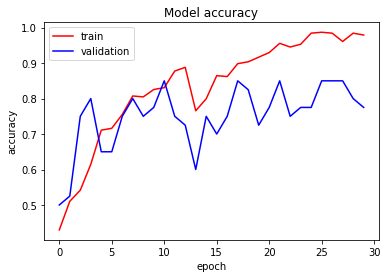

In [19]:
# displaying the model accuracy
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [20]:
pred = model.predict(X_test)

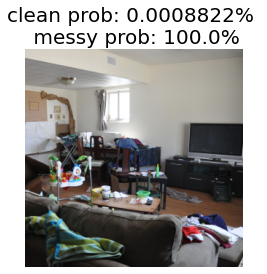

In [21]:
count=7
img = cv2.imread(test_path[count])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
txt = "clean prob: {:.4}% \n messy prob: {:.4}%".format( 100*pred[count][0], 100*pred[count][1])

plt.imshow(img)
plt.title(txt, fontsize = 20)
plt.axis('off')
plt.show()

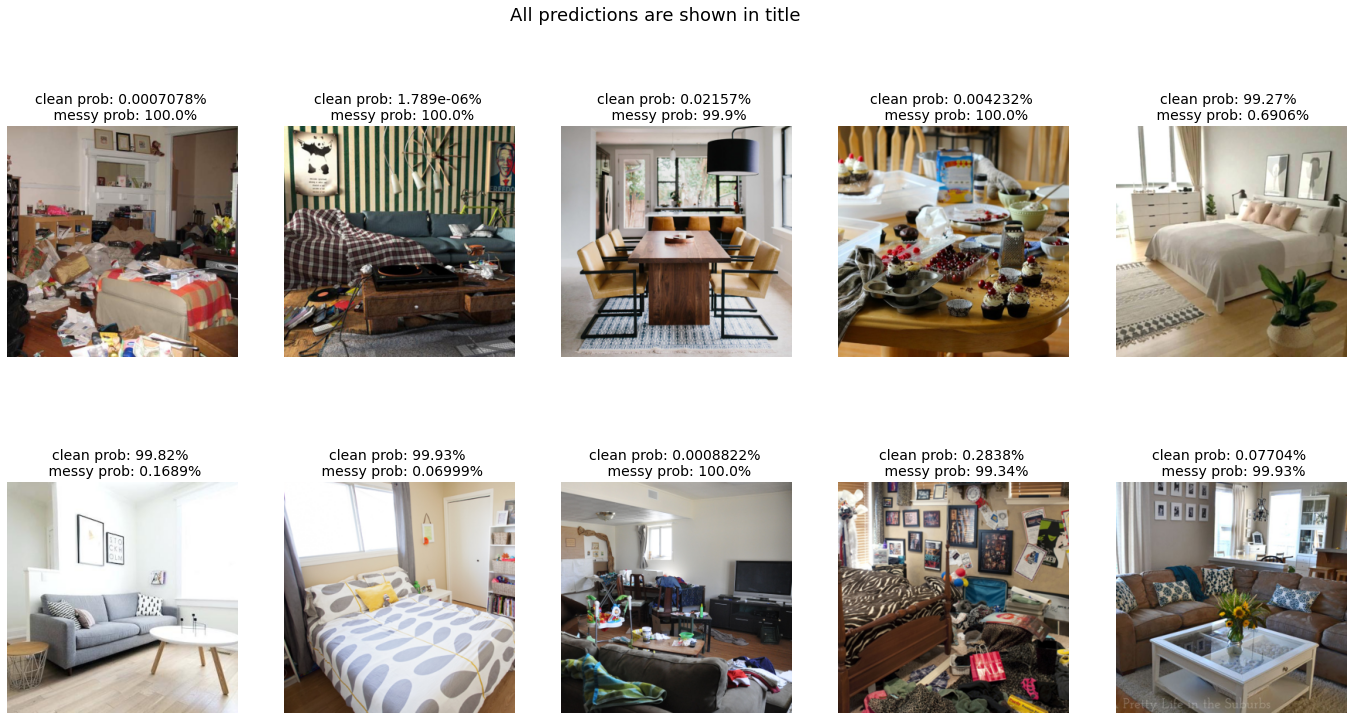

In [22]:
fig, axs= plt.subplots(2,5, figsize=[24,12])


count=0
for i in range(2):    
    for j in range(5):  
        
        img = cv2.imread(test_path[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
       
        txt = "clean prob: {:.4}% \n messy prob: {:.4}%".format( 100*pred[count][0], 100*pred[count][1])
        
                
        axs[i][j].imshow(img)
        axs[i][j].set_title(txt, fontsize = 14)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()

In [23]:
import requests
from bs4 import BeautifulSoup
import io
import os
from PIL import Image
import hashlib

In [44]:
# Tải ảnh
url = 'https://bloganchoi.com/wp-content/uploads/2016/08/Phong-lon-xon-00.jpg'
folder_path = '/content'
image_content = requests.get(url).content
image_file = io.BytesIO(image_content)
image = Image.open(image_file).convert('RGB')
file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '1.jpg')
with open(file_path, 'wb') as f:
    image.save(f, "JPEG", quality=85)
print(f"SUCCESS - saved {url} - as {file_path}")

SUCCESS - saved https://bloganchoi.com/wp-content/uploads/2016/08/Phong-lon-xon-00.jpg - as /content/3669839d2d1.jpg


Shape of X_train:  (1, 100, 100, 3)


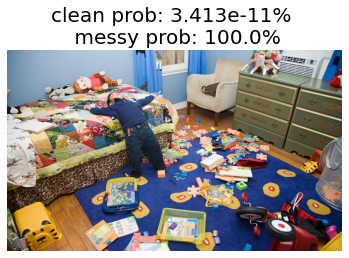

In [45]:
X = []
#Đường dẫn của hình ảnh
path = '/content/3669839d2d1.jpg'
image = cv2.imread(path)        
image =  cv2.resize(image, (100,100))    
X.append(image)
X = np.array(X)
print("Shape of X_train: ", X.shape)
#X[:2]
X = X.astype('float32')
X /= 255
pred = model.predict(X)

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
txt = "clean prob: {:.4}% \n messy prob: {:.4}%".format( 100*pred[0][0], 100*pred[0][1])

plt.imshow(img)
plt.title(txt, fontsize = 20)
plt.axis('off')
plt.show()

In [ ]:
#print("Shape of X_train: ", X.shape)

In [ ]:
#X[:2]

In [30]:
#X = X.astype('float32')
#X /= 255

In [ ]:
#pred = model.predict(X)
#print(pred[0][0])

In [ ]:
#img = cv2.imread(path)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#txt = "clean prob: {:.4}% \n messy prob: {:.4}%".format( 100*pred[0][0], 100*pred[0][1])

#plt.imshow(img)
#plt.title(txt, fontsize = 20)
#plt.axis('off')
#plt.show()